# **Customer Churn Prediction in Telecom Industry**

**Team Memebers:** <br>

Fahad Alsubaie<br>
Haaniya Umair<br>
Jiayi Huang<br>
Parita Patel<br>
Yifei Cheng<br>




Colab File Link - https://colab.research.google.com/drive/1p5mb3yonalerpeTzj2VYwh9QxjSYybqc?usp=sharing

## Problem Statement

In this project, we aim to create a model that can effectively predict when customers might churn within a telecommunications company. The cost of acquiring new customers typically outweighs the expenses involved in retaining existing ones, an accurate churn prediction model can help the company allocate resources more effectively. Correctly predicting customers who are likely to churn can significantly benefit the company by reducing the overall costs associated with customer acquisition. This will help decrease customer turnover, improve customer satisfaction, and ensure better retention rates. We will use supervised machine learning techniques to build models that can classify customers as potential churners or non-churners based on their historical usage patterns, service plan features etc. This model will assist the company in identifying customers who are likely to leave in advance, enabling them to take timely actions to retain them.

## Motivation

The telecom industry has a churn rate of 21% following cable (25%), financial/credit (25%), general retail (24%), and online retail (22%). Its churn rate is just a tad lower than fast-moving retail goods. One study even estimated that individual telecom businesses lose up to $65 million because of churn.

Efficient churn analysis involves the early identification and anticipation of customers likely to churn, which leads to promptly addressing issues and enhancing satisfaction. According to some reports, the acquisition cost is 5 times that of the retention cost. The prediction model will help with strategic and efficient resource allocation for acquisition or retention activities. It also helps with optimizing marketing spend through predictive churn analytics. The overall impact extends to minimizing revenue loss through targeted strategies and fostering long-term customer relationships, contributing to sustained business growth.

## Practical Implications

• Targeted Marketing: By segmenting customers based on their churn likelihood, the company can target its marketing campaigns more effectively. High-risk customers can receive campaigns focused on retention. <br>
• The insights gained from the model can guide improvements in customer support. For example, if the model identifies that poor customer service interactions are a significant churn driver, the company can invest in training and resources to address this issue.<br>
• Financial Impact: By allocating resources where they are most needed, the company can optimize its budget and efforts. By reducing churn, the company can increase its revenue and profitability.<br>
• Customer-Centric Approach: This project reflects a customer-centric approach, which is crucial in today's competitive market. It demonstrates that the company cares about its customers and is willing to invest in retaining them.<br>

# Data Preview

This dataset will be used for predicting customer churn in telecommunications industry, and it contains categorical varibles and numerical varibles that can be explored and analyzed for predictive modeling and insights. The dataset can be accessed by : https://data.world/bob-wakefield/call-center-data

### Data Loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
url = 'https://raw.githubusercontent.com/Parita2442/BA810-Project-Churn-Dataset/main/customer_churn_data.csv'
df = pd.read_csv(url)
df.head()

,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


### Data Description

In [ ]:
print("The data has {} number of rows and {} number of columns.".format(df.shape[0],df.shape[1]))

The data has 12892 number of rows and 22 number of columns.


### Column Description

| Column     | Description |
| ----------- | ----------- |
| recordID | Primary key of the record|
|state| Customers state|
|account_length| Age of account in months|
|area_code | area code|
|international_plan|Whether or not the customer has an international calling plan|
|voice_mail_plan | Whether or not the customer has a voice mail plan |
|number_vmail_messages|Number of VM messages customer currently has on the server|
|total_day_minutes|Customers total usage of day minutes in plan|
|total_day_calls | Total number of calls customer has made during the day|
|total_day_charge |How much the customer has been charged for day minutes|
|total_eve_minutes|Customers total usage of evening minutes in plan|
|total_eve_calls |Total number of calls customer has made during the evening|
|total_eve_charge|How much the customer has been charged for evening minutes|
|total_night_minutes | Customers total usage of night minutes in plan|
|total_night_calls |Total number of calls customer has made during the night|
|total_night_charge|How much the customer has been charged for night minutes|
|total_intl_minutes|Total international minutes|
|total_intl_calls|Total international calls|
|total_intl_charge|Total international charges|
|number_customer_service_calls|How many times the customer has called the IVR system|
|churn |Customer has churned|
|customer_id | Enterprise ID of the customer|

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordID                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  object 
 5   voice_mail_plan                12892 non-null  object 
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

### Summary Statistics

In [ ]:
df.describe()

,recordID,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,12892.00000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,1.289200e+04
mean,6446.50000,100.676621,437.133804,7.996665,180.162023,100.266599,30.628086,200.711852,100.137139,17.060717,200.557834,100.038241,9.025192,10.244702,4.467654,2.766584,1.563683,2.830245e+11
std,3721.74417,39.806413,42.341820,13.641977,54.207056,19.946657,9.215171,50.781851,19.894032,4.316445,50.632872,19.749714,2.278507,2.782623,2.466493,0.751269,1.310606,3.205835e+13
min,1.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3223.75000,73.000000,408.000000,0.000000,144.000000,87.000000,24.480000,166.200000,87.000000,14.130000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,2.409909e+07
50%,6446.50000,100.000000,415.000000,0.000000,180.000000,101.000000,30.600000,201.150000,100.000000,17.095000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,3.219535e+07
75%,9669.25000,127.000000,510.000000,19.000000,216.300000,114.000000,36.770000,234.900000,114.000000,19.970000,235.100000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000,5.535319e+07
max,12892.00000,243.000000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


In [ ]:
df.describe(include=object)

,state,international_plan,voice_mail_plan,churn
count,12892,12892,12892,12892
unique,51,2,2,2
top,WV,no,no,no
freq,402,11651,9372,11069


# Data Exploration

In [ ]:
df.dropna(inplace=True)
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}).astype(int)

Mapping the dataset and converting the string 'Yes' and 'No' to numeric data type - 1 and 0 respectively, for prediction and analysis functions.

<ipython-input-8-0025cc774a3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


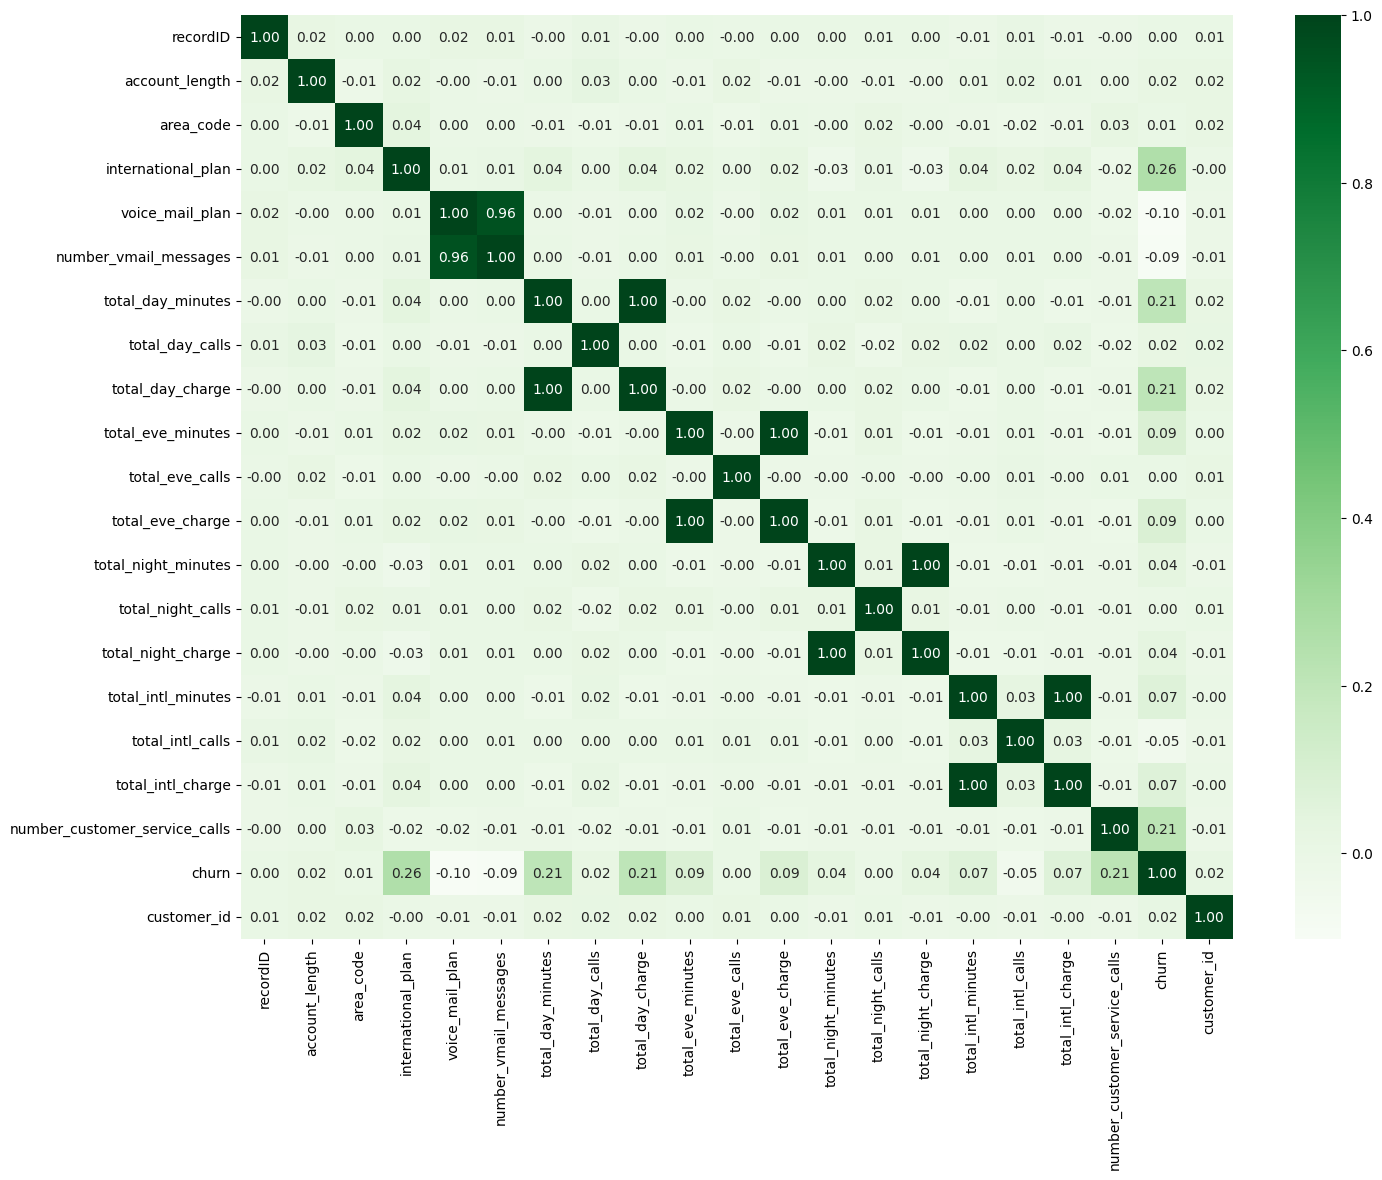

In [ ]:
plt.figure(figsize = (16,12))
correlations = df.corr()
sns.heatmap(correlations,annot=True,cmap="Greens",fmt=".2f" )
plt.show()

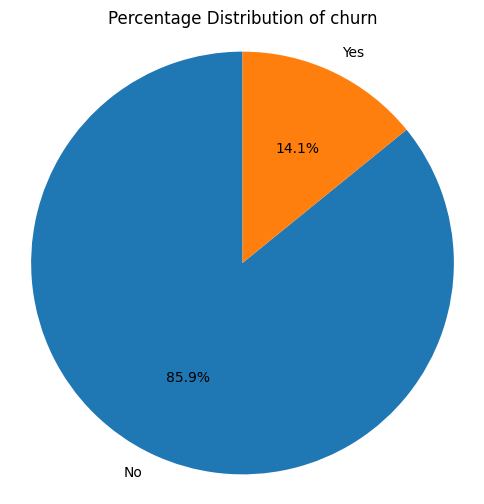

In [ ]:
import matplotlib.pyplot as plt

chun_counts = df['churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(chun_counts, labels=['No','Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of churn')
plt.axis('equal');

As we can see a high class imbalance in the churn distribution, we take balanced accuracy as a scoring measure instead of accuracy score.

In [ ]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
dataoveriew(df, 'Overiew of the dataset')

Overiew of the dataset:

Rows: 12892

Number of features: 22

Features:
['recordID', 'state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn', 'customer_id']

Missing values: 0

Unique values:
recordID                         12892
state                               51
account_length                     218
area_code                            3
international_plan                   2
voice_mail_plan                      2
number_vmail_messages               48
total_day_minutes                 1961
total_day_calls                    123
total_day_charge                  1961
total_eve_minutes                 1879
total_eve_calls                    126


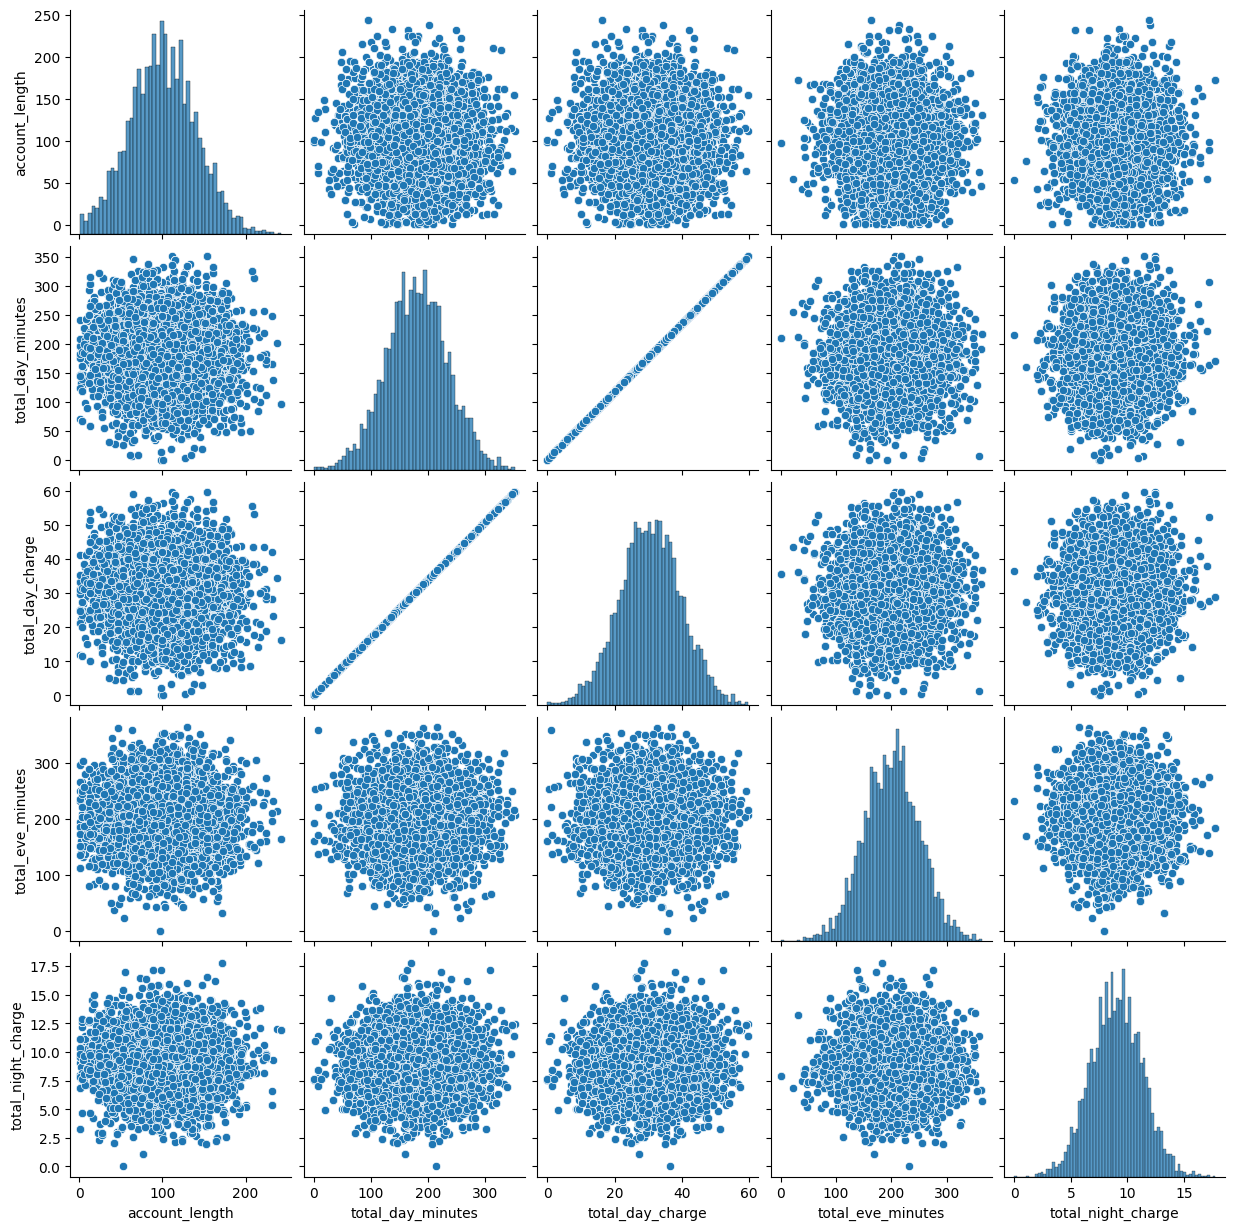

In [ ]:
numeric_df = df[['account_length','total_day_minutes','total_day_charge', 'total_eve_minutes', 'total_night_charge']]
sns.pairplot(numeric_df);

# Data Preprocessing

In [ ]:
# created and kept a copy of the original dataframe in case needed in the future.
data = df.copy()

In [ ]:
# change international_plan, voice_mail_plan, churn to categories - change yes no to 0 & 1
df['international_plan']=df['international_plan'].astype('category')
df['voice_mail_plan']=	df['voice_mail_plan'].astype('category')
df['churn'] = df['churn'].astype('category')
df['area_code'] = df['area_code'].astype('category')

In [ ]:
# drop Record ID and customer ID - unique values , total charges- rates same based on usage
df.drop(columns=['recordID','customer_id', 'state','total_day_charge','total_eve_charge',
                 'total_night_charge','total_intl_charge'],inplace=True)

'Customer_id' and 'recordID' are dropped because they are unique and do not hold any importance in the models. Looking at the correlation matrix, the 'total charges' columns are highly correlated to the 'call minutes' columns (as total charges is a product of minutes and rate), we drop them as it affects the target variable - churn in the same way.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   account_length                 12892 non-null  int64   
 1   area_code                      12892 non-null  category
 2   international_plan             12892 non-null  category
 3   voice_mail_plan                12892 non-null  category
 4   number_vmail_messages          12892 non-null  int64   
 5   total_day_minutes              12892 non-null  float64 
 6   total_day_calls                12892 non-null  int64   
 7   total_eve_minutes              12892 non-null  float64 
 8   total_eve_calls                12892 non-null  int64   
 9   total_night_minutes            12892 non-null  float64 
 10  total_night_calls              12892 non-null  int64   
 11  total_intl_minutes             12892 non-null  float64 
 12  total_intl_calls               1

As the dataset is highly imbalanced, we use the stratification technique for the train test split, so a more accurate model prediction is achieved.

### Stratified Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='churn')
y=df.churn
X_train_all_features,X_test_all_features,y_train_all_features,y_test_all_features = train_test_split(X,y,test_size=0.20,stratify=y,random_state=12)
X_train_all_features.shape, X_test_all_features.shape, y_train_all_features.shape, y_test_all_features.shape

((10313, 14), (2579, 14), (10313,), (2579,))

### Preprocessing Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),('standard scaler',StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(drop="first"))
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard scaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f745c60>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f4427a0>)])

### Feature Selection - Logistic Regression L1

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = LogisticRegression(penalty='l1', solver='liblinear')

select_from_model = SelectFromModel(lr)

model_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', select_from_model),
    ('model', lr)])

model_pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f745c60>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f4427a0>)])),
                ('select',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              solver='liblinear'))),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [ ]:
#Grid Search Using L1 regularization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'select__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'select__threshold': ['mean', 'median']
}

grid_search = GridSearchCV(model_pipe, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_all_features, y_train_all_features)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

best_model = grid_search.best_estimator_

selected_features = best_model['prep'].get_feature_names_out()[best_model['select'].get_support()]
print(f'The selected features are {selected_features}')

Best parameters: {'select__estimator__C': 0.1, 'select__threshold': 'median'}


,param_select__estimator__C,param_select__threshold,mean_test_score
5,0.1,median,0.594585
3,0.01,median,0.593777
0,0.001,mean,0.592235
1,0.001,median,0.592235
7,1,median,0.589138
9,10,median,0.589138
11,100,median,0.589138
2,0.01,mean,0.568336
4,0.1,mean,0.568166
6,1,mean,0.566509


The selected features are ['num__total_day_minutes' 'num__total_eve_minutes'
 'num__total_night_minutes' 'num__total_intl_minutes'
 'num__total_intl_calls' 'num__number_customer_service_calls'
 'cat__international_plan_1' 'cat__voice_mail_plan_1']


<Axes: ylabel='Feature'>

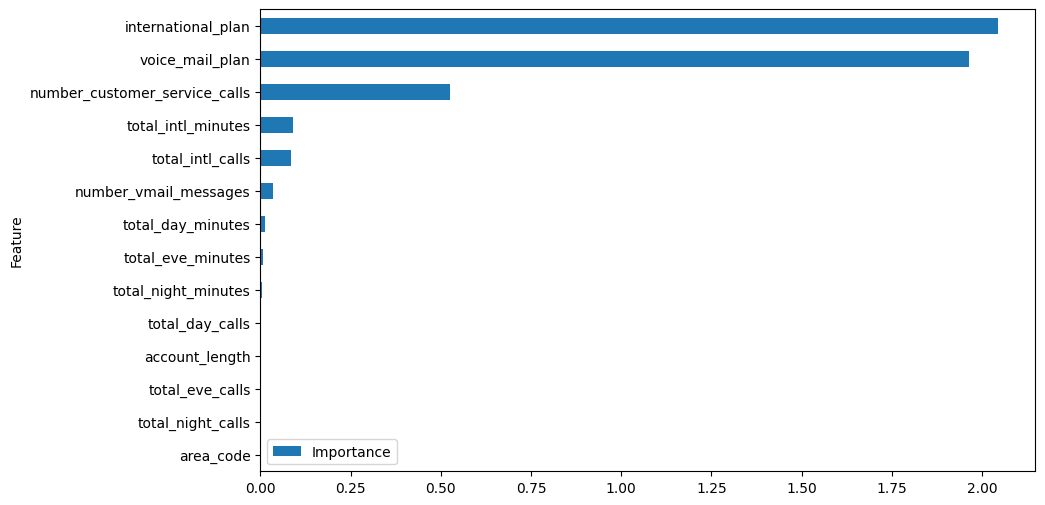

In [ ]:
# Feature Importance
lr.fit(X_train_all_features, y_train_all_features)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lr.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<ipython-input-19-05b557d4c8e6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=plt.cm.get_cmap('viridis_r')(feature_importance['Importance']))


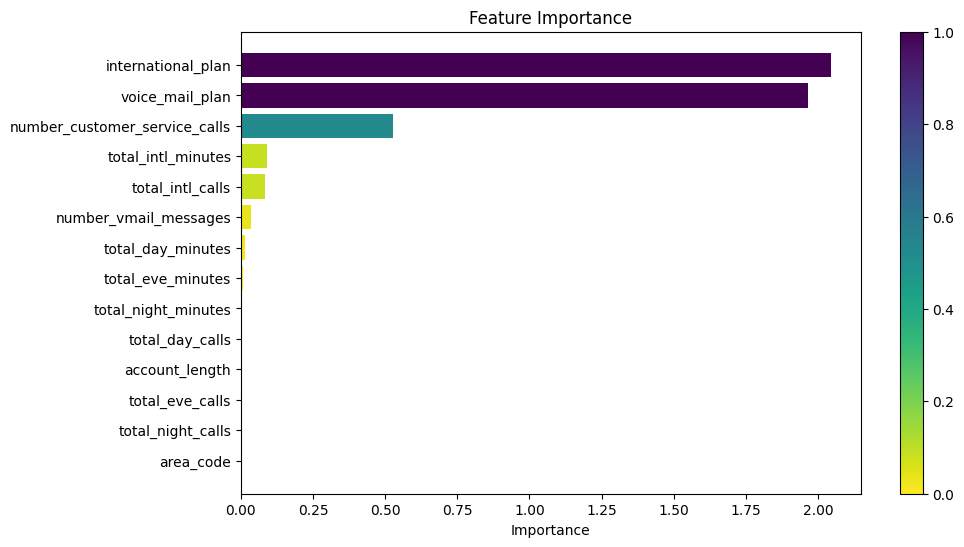

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=plt.cm.get_cmap('viridis_r')(feature_importance['Importance']))

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), ax=ax)

ax.set_xlabel('Importance')
ax.set_title('Feature Importance')

plt.show()

In [ ]:
selected_features = ['total_day_minutes', 'total_eve_minutes',
 'total_night_minutes', 'total_intl_minutes',
 'total_intl_calls', 'number_customer_service_calls',
 'international_plan', 'voice_mail_plan']
X_train = X_train_all_features[selected_features]
y_train = y_train_all_features
X_test= X_test_all_features[selected_features]
y_test = y_test_all_features

Lasso shrinks the less important feature’s coefficient to zero thus, removing some features altogether. So, this works well for feature selection in case we have a huge number of features. This is why we used L1 with logistic regression to find the best features for our model.

### Cost Function

In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 34 + cm[0,1] * 7
  # cost of 34 for false negative and 7 for false positives

cost_scorer = make_scorer(default_cost)

The industry average for Monthly revenue per customer in the telecom industry is USD 62 and the gross margin is 55%. Studies show that the acquisition cost is 5 times that of the retention cost in the industry.
A telecom company will have to incur costs like - customer acquisition and retention costs. When the model predicts correctly, it helps the company efficiently allocate its resources towards the acquisition and retention activities.

When the model predicts that a customer will not churn but in actuality, change their service provider (False Negative), the company loses out on the revenue that that customer would have generated ( 64*0.55 = USD 34). Whereas, when the model predicts that a customer will churn but instead, he doesn't (False Positive) - the company wrongly incurs retention costs (Acquistion cost/ 5 = USD 7) to try and keep the customer with their telecom plan.


### Score Function

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def print_scores(y_test, y_pred):
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False)
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy = {accuracy:.4f}, Balanced Accuracy = {balanced_accuracy:.4f}')
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f'Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}')
  cost = default_cost(y_test, y_pred)
  print(f'Cost = {cost}')

# Model Building

## 1. Logistic Regression

In [ ]:
lr_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lr)])

lr_pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f745c60>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a730f4427a0>)])),
                ('model',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

### L1 Scores

Accuracy: 0.8631
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2214
           1       0.54      0.20      0.29       365

    accuracy                           0.86      2579
   macro avg       0.71      0.59      0.61      2579
weighted avg       0.83      0.86      0.83      2579

Balanced Accuracy of Logistic Regression with L1: 0.5862240289069558
Accuracy = 0.8631, Balanced Accuracy = 0.5862
Precision = 0.5448, Recall = 0.2000, F1-score = 0.2926
Cost = 10355


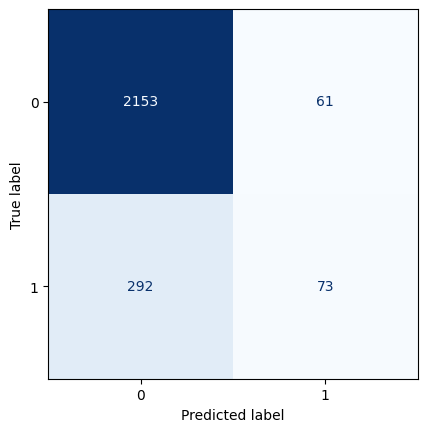

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='saga', random_state=42)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)
print(f'Balanced Accuracy of Logistic Regression with L1: {balanced_accuracy}')
print_scores(y_test, y_pred)

The Logistic Regression model with L1 regularization exhibits a high overall accuracy of 86.31%, indicating strong performance on the majority class. The Balanced Accuracy of approximately 58.62% suggests a reasonable ability to make accurate predictions across both classes, considering class imbalance. The relatively low recall indicates that the model might not effectively capture all actual positive instances. The cost associated with misclassifications is 10,355, highlighting the economic impact of prediction errors.

### Grid Search with L2

In [ ]:
# Grid Search using L2 regularization

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

lr_l2_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lr_l2 )
])

param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'model__threshold': ['mean', 'median']
}

grid_search = GridSearchCV(lr_l2_pipe, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

Best parameters: {'model__C': 10}


,param_model__C,mean_test_score
4,10,0.595158
5,100,0.595158
3,1,0.594411
2,0.1,0.585354
1,0.01,0.548520
0,0.001,0.508295


### L2 Scores

Accuracy = 0.8631, Balanced Accuracy = 0.5862
Precision = 0.5448, Recall = 0.2000, F1-score = 0.2926
Cost = 10355


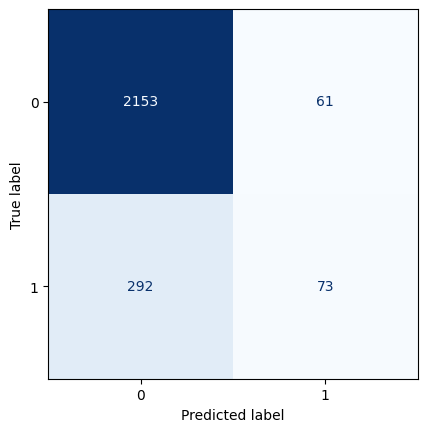

In [ ]:
y_pred= grid_search.best_estimator_.predict(X_test)
print_scores(y_test, y_pred)


The Logistic Regression model with L2 regularization, tuned using grid search, presents an accuracy of 86.31% and a balanced accuracy of 58.62%. The use of L2 regularization helps control overfitting by penalizing large coefficients. It's noteworthy that while the accuracy is high, the balanced accuracy is not significantly higher than that achieved with L1 regularization. This suggests that in the context of the imbalanced dataset, the benefits of L2 regularization in improving balanced accuracy might be limited.

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.2 MB/s eta 0:00:00


### Bayesian Optimization with L1

In [ ]:
# Bayesian Optimization with L1
from skopt import BayesSearchCV

param_space = {
    'model__C': (0.001, 1000.0, 'log-uniform')
}

bayes_search_1 = BayesSearchCV(
    lr_pipe,
    param_space,
    n_iter=50,
    cv=5,
    scoring='balanced_accuracy',
    random_state=42
)

bayes_search_1.fit(X_train, y_train)

cv_res = pd.DataFrame(bayes_search_1.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


,param_model__C,mean_test_score
25,767.513693,0.595158
30,13.717307,0.595158
28,31.567638,0.595158
27,6.148263,0.595158
26,49.63817,0.595158
1,105.762117,0.595158
31,20.658877,0.595158
23,158.597896,0.595158
22,16.82718,0.595158
21,7.500133,0.595158


### Scores for Logistic Regression with best parameters from Bayesian L1

Accuracy = 0.8631, Balanced Accuracy = 0.5862
Precision = 0.5448, Recall = 0.2000, F1-score = 0.2926
Cost = 10355


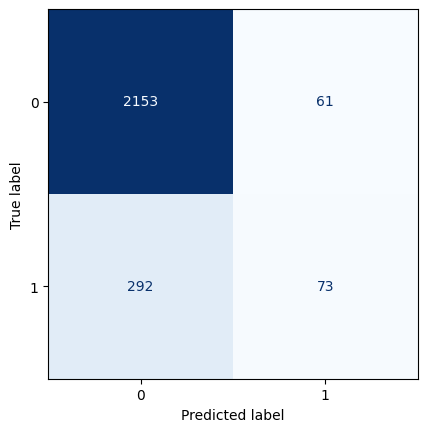

In [ ]:
best_model = bayes_search_1.best_estimator_
y_pred = best_model.predict(X_test)
print_scores(y_test, y_pred)

The Bayesian-optimized Logistic Regression model with L1 regularization demonstrates an accuracy of 86.31% and a balanced accuracy of 58.62%. There is no improvement in the accuracy or balanced accuracy scores when the searching strategies are changed. The Bayesian optimization process likely contributed to fine-tuning hyperparameters for improved performance, but no improvment in the balanced accuracy was noticed.

### Bayesian Optimization with L2

In [ ]:
# Bayesian Optimization with L2
from skopt import BayesSearchCV

lrl2 = LogisticRegression(penalty='l2')

lr2_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('model', lrl2)
])

param_space = {
    'model__C': (0.001, 1000.0, 'log-uniform')
}

bayes_search_2 = BayesSearchCV(
    lr2_pipe,
    param_space,
    n_iter=50,
    cv=5,
    scoring='balanced_accuracy',
    random_state=42
)

bayes_search_2.fit(X_train, y_train)

cv_res = pd.DataFrame(bayes_search_2.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))

,param_model__C,mean_test_score
46,2.547234,0.595271
38,3.321972,0.595214
27,3.411386,0.595214
41,3.858294,0.595214
17,4.019829,0.595214
23,2.901769,0.595214
33,2.747669,0.595214
30,3.443508,0.595214
24,50.587,0.595158
1,105.762117,0.595158


### Cost for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
lr_costs = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring=cost_scorer)
print(f'The average cost of Logistic Regression is {lr_costs.mean():.1f}.')

The average cost of Logistic Regression is 8102.4.


### Scores for Logistic Regression with best parameters from Bayesian L2

Accuracy = 0.8631, Balanced Accuracy = 0.5862
Precision = 0.5448, Recall = 0.2000, F1-score = 0.2926
Cost = 10355


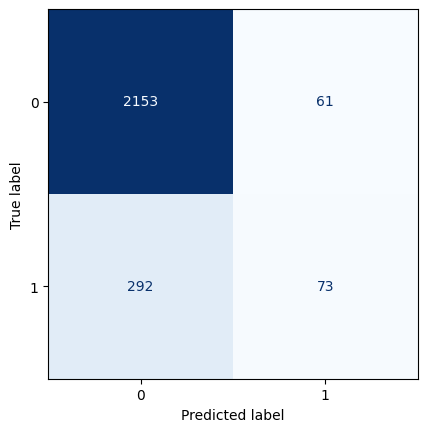

In [ ]:
best_model = bayes_search_2.best_estimator_
y_pred = best_model.predict(X_test)
print_scores(y_test, y_pred)

The Bayesian-optimized Logistic Regression model with L2 regularization exhibits an accuracy of 86.31% and a balanced accuracy of 58.62%. A different searching strategy did not yield improved results from that of grid search. Using L2 with Bayesian with L2 did not change results of the model.

### Class Imbalance through SMOTENC - Logistic Regression

Accuracy = 0.7608, Balanced Accuracy = 0.7634
Precision = 0.3448, Recall = 0.7671, F1-score = 0.4758
Cost = 6614


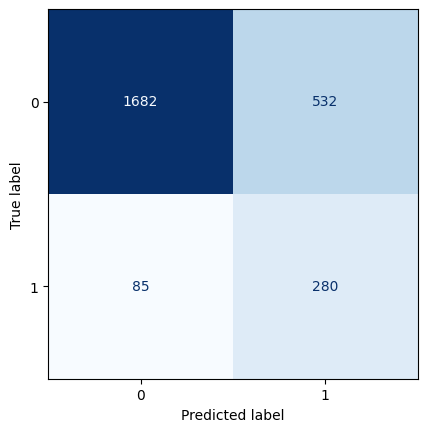

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline, make_pipeline

lr_smote_pipe = make_pipeline(prep_pipeline, SMOTENC(categorical_features=[6,7], random_state=42), LogisticRegression(C=2.547234))
lr_smote_pipe.fit(X_train, y_train)
y_pred_smote = lr_smote_pipe.predict(X_test)
print_scores(y_test, y_pred_smote)

## 2. K-Nearest Neighbors

### KNN Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessing', prep_pipeline),
    ('knn', KNeighborsClassifier()),
])

knn_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d73a83a0640>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d73a790dbd0>)])),
                ('knn', KNeighborsClassifier())])

### Grid Search

In [ ]:
param_grid = [
    {'knn__n_neighbors': np.arange(2, 21, 2),
     'knn__p': np.arange(2, 21, 2)
     },
    ]

print('The parameter grid : ')
print(param_grid)

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=3,
                                 scoring='balanced_accuracy', error_score='raise')
grid_search.fit(X_train, y_train)
print('\n\nThe best parameters are ', grid_search.best_params_)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'knn__n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]), 'knn__p': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])}]


The best parameters are  {'knn__n_neighbors': 2, 'knn__p': 2}


,param_knn__n_neighbors,param_knn__p,mean_test_score
0,2,2,0.830297
2,2,6,0.822074
5,2,12,0.821675
1,2,4,0.821562
7,2,16,0.820533


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint

param_distribs = [
    {'knn__n_neighbors': randint(2, 20),
     'knn__p': randint(2, 20)
     },
    ]

random_search = RandomizedSearchCV(knn_pipeline, param_distribs, n_iter=25, cv=3,
                                 scoring='balanced_accuracy', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_knn__n_neighbors,param_knn__p,mean_test_score
5,3,13,0.835653
23,3,7,0.833930
7,2,13,0.820533
21,5,19,0.771951
6,7,3,0.761388


### Scores and Costs

In [ ]:
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='balanced_accuracy')

print(f'The balanced accuracy of K Nearest Neighbor is {knn_scores.mean():.3f}.')

The balanced accuracy of K Nearest Neighbor is 0.795.


In [ ]:
knn_costs = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring=cost_scorer)
print(f'The average cost of k-Nearest Neighbor is {knn_costs.mean():.1f}.')

The average cost of k-Nearest Neighbor is 4117.8.


### Scores and Costs with Best Parameters

Accuracy = 0.9628, Balanced Accuracy = 0.9154
Precision = 0.8832, Recall = 0.8493, F1-score = 0.8659
Cost = 2157


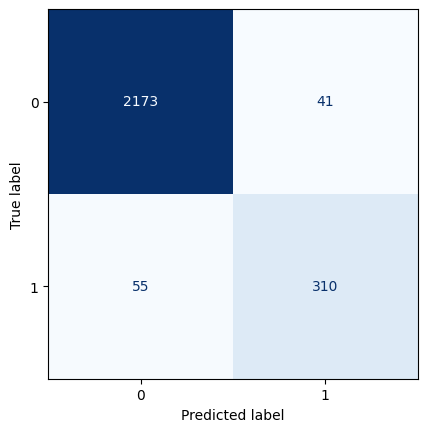

In [ ]:
random_search.best_estimator_.fit(X_train,y_train)
y_pred = random_search.best_estimator_.predict(X_test)
print_scores(y_test, y_pred)

After applying grid search and random search to find the best parameters, the K-Nearest Neighbors model using the result exhibits an accuracy of 96.28% and a balanced accuracy of 91.54%, which greatly improved the accuracy than before using the best parameters. The cost has also been reduced greatly from over 4000 dollars to 2157 dollars.

## 3. Decision Trees

### Fit Dataset in Prep Pipeline

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

X_train_prepd = prep_pipeline.fit_transform(X_train)


X_test_prepd = prep_pipeline.transform(X_test)


Applying the preprocessing as a separate step and work with the transformed data

We are going to build a small tree, stopping after the depth has reached 3, just for our inspection. max_depth is only one of many arguments to limit the growth of a tree (control complexity, thus variance and overfitting, by incurring some bias). We use this because it most directly controls the look/structure of the tree (how tall we want it to be).

### Create CLF Model and Fit it to the Train Data

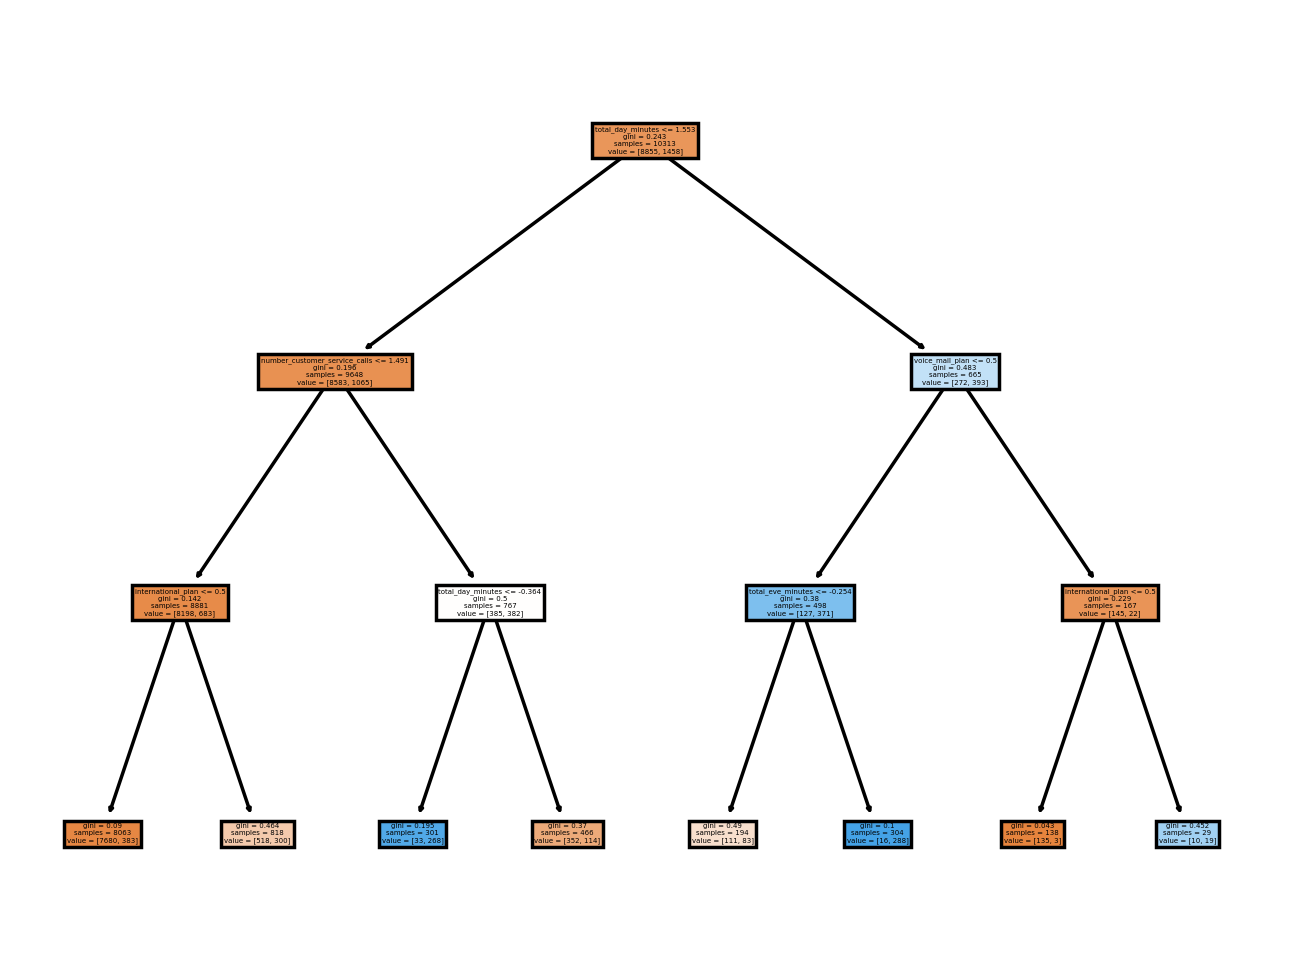

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train_prepd, y_train)

plt.figure(dpi=250)
plot_tree(clf, filled=True, feature_names=list(X_train.columns));

We have build a small tree, stopping after the depth has reached 3, just for our inspection. max_depth is only one of many arguments to limit the growth of a tree (control complexity, thus variance and overfitting, by incurring some bias). We use this because it most directly controls the look/structure of the tree (how tall we want it to be).

### Visualizing the cost-complexity pruning path

There are 133 alpha values.


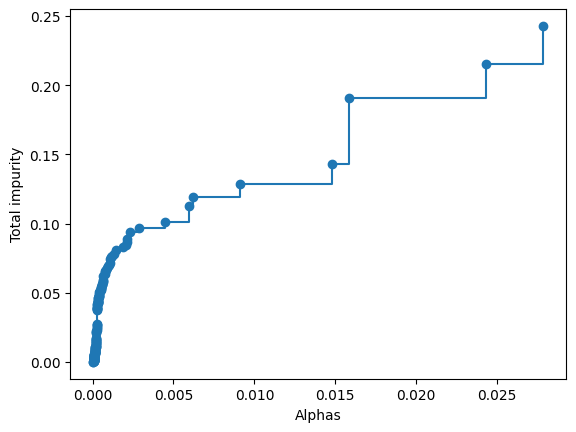

In [ ]:
clf_full = DecisionTreeClassifier()
path = clf_full.cost_complexity_pruning_path(X_train_prepd, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # default impurity is Gini
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas'); plt.ylabel('Total impurity');

print(f'There are {ccp_alphas.shape[0]} alpha values.')

At $α=0$ we have no pruning: the leaves will contain primarily one of the two classes, so low gini impurity index. At the largest $α$ value, we have the gini of the original training data (without any split), therefore, high gini impurity index.

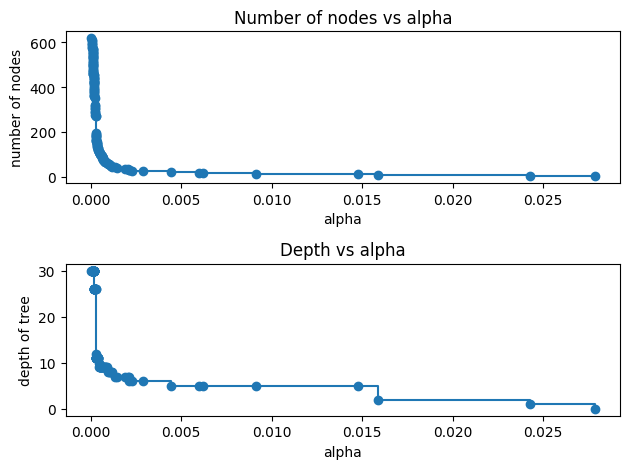

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_i = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_i.fit(X_train_prepd, y_train)
    clfs.append(clf_i)

node_counts = [clf_i.tree_.node_count for clf_i in clfs]
depth = [clf_i.tree_.max_depth for clf_i in clfs]

fig, ax = plt.subplots(2, 1, dpi=100)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The trees get smaller as $α$ increases. we wil see which one of those 133 trees predicts best.

### Plotting Accuracy vs Alpha

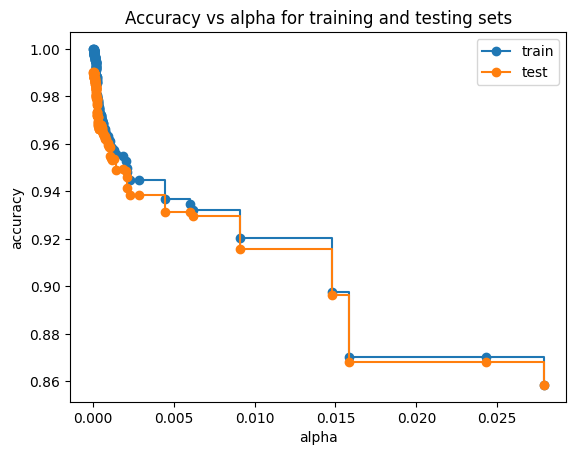

In [ ]:
train_scores = [clf_i.score(X_train_prepd, y_train) for clf_i in clfs]
test_scores = [clf_i.score(X_test_prepd, y_test) for clf_i in clfs]

fig, ax = plt.subplots(dpi=100)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The  accuracy monotonically decreases with the $α$ (as the tree gets smaller)

### Grid Search for the optimal value of the (ccp_alpha)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': ccp_alphas}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_prepd, y_train)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head())
best_tree = grid_search.best_estimator_
print(f'The total number of nodes is {best_tree.tree_.node_count} and the max depth is {best_tree.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
0,0.0,0.983515
1,0.000048,0.983515
2,0.000064,0.983419
3,0.000064,0.983419
4,0.000065,0.983419


The total number of nodes is 619 and the max depth is 30.



We have a relatively narrow range of alpha values with near best performances. Let's test the tree that corresponds to the best $α$:

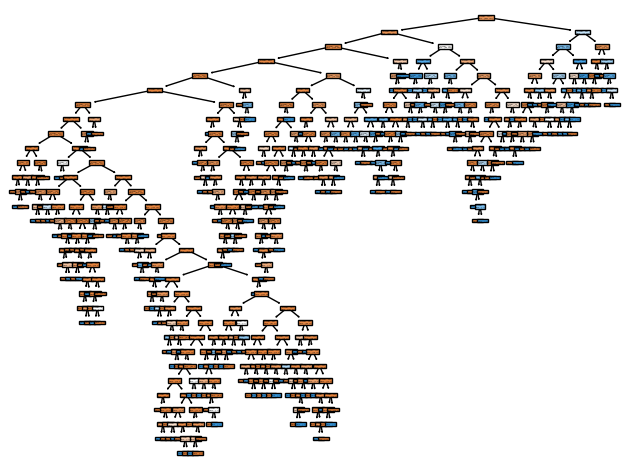

In [ ]:
fig, ax = plt.subplots()
plot_tree(best_tree, filled=True, feature_names=list(pd.DataFrame(X_train_prepd).columns), impurity=False) # opt
fig.tight_layout()


### Scores and Costs

In [ ]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score


y_pred_clf = clf.predict(X_test_prepd)

print('Accuracy score :' ,accuracy_score(y_test,y_pred_clf))
print('Balanced accuracy score :' ,balanced_accuracy_score(y_test,y_pred_clf))

Accuracy score : 0.9026754556029469
Balanced accuracy score : 0.6836210416898689


In [ ]:
from sklearn.model_selection import cross_val_score
clf_costs = cross_val_score(clf, X_train, y_train, cv=5, scoring=cost_scorer)
print(f'The average cost of clf is {clf_costs.mean():.1f}.')

The average cost of clf is 6010.2.


In [ ]:
from sklearn.metrics import balanced_accuracy_score
best_model = grid_search.best_estimator_
y_pred_clf_best = best_model.predict(X_test_prepd) # predict on test data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_clf_best )  # evaluate predictions
print(f'Balanced accuracy of the best found model on the test data is {test_balanced_accuracy:.3f}')
print('Accuracy score of the best found model on the test data is:' , accuracy_score(y_test,y_pred_clf_best))


Balanced accuracy of the best found model on the test data is 0.979
Accuracy score of the best found model on the test data is: 0.9906940674680108


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_clf_best)
print(cm)

[[2204   10]
 [  14  351]]


In [ ]:
# Calculate the cost on the test set
test_cost = default_cost(y_test, y_pred_clf_best)
print(f'The cost on the test set is {test_cost:.1f}.')

The cost on the test set is 546.0.


Accuracy = 0.9907, Balanced Accuracy = 0.9786
Precision = 0.9723, Recall = 0.9616, F1-score = 0.9669
Cost = 546


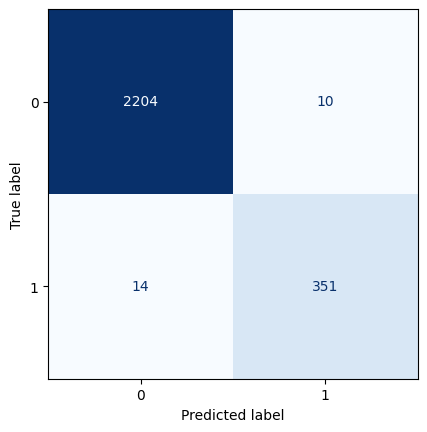

In [ ]:
y_pred = best_model.predict(X_test_prepd)
print_scores(y_test, y_pred)

### Class Imbalance through SMOTENC - Decision Tree

Accuracy = 0.9853, Balanced Accuracy = 0.9811
Precision = 0.9247, Recall = 0.9753, F1-score = 0.9493
Cost = 509


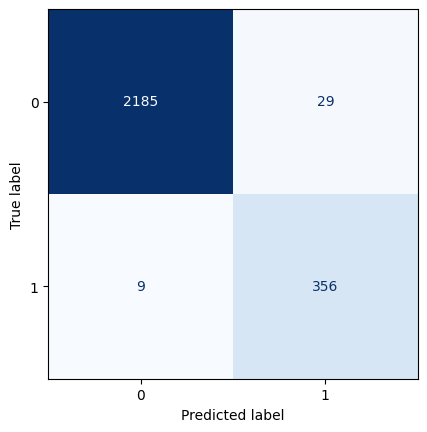

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

dt_smote_pipe = make_pipeline(prep_pipeline, SMOTENC(categorical_features=[6,7], random_state=42), DecisionTreeClassifier())
dt_smote_pipe.fit(X_train, y_train)
y_pred_smote = dt_smote_pipe.predict(X_test)
print_scores(y_test, y_pred_smote)

SMOTENC helped improve the model's performance, especially in capturing patterns within the minority class. In summary, the high balanced accuracy, precision, recall, and F1-score, along with a relatively low cost, suggest that the Decision Tree model, trained on a dataset with SMOTENC, effectively handles class imbalance.

## 4. SVM

After looking at the performance of the above models, we decided to try the Support Vector Machine to train and test the learning model. As we saw fromt he first model - Logistic Regression, the model does not perform like we do like for it to. It is safe to say that the model does not show a linear relationship. To test this theory, we use the SVM and tune it based on kernels (linear, poly or radial) as well as C and gamma for regularization.

Additionally, SVMs are less prone to overfitting and hence might prove to be a more reliable option (as we were considering a situation in which the decision tree model specified above could be overfitting).

### Check support vectors and create Pipeline

In [ ]:
from sklearn.svm import SVC

lin_svc = SVC(kernel='linear')

svm_lin_pipeline = Pipeline([
    ("preprocessing", prep_pipeline),
    ("svm", lin_svc),
])

svm_lin_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d73a83a0640>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d73a790dbd0>)])),
                ('svm', SVC(C=2, kernel='linear'))])

In [ ]:
svm_lin_pipeline.fit(X_train, y_train)
y_pred_lin_svm = svm_lin_pipeline.predict(X_test)

print(lin_svc.n_support_)

cost_scorer(svm_lin_pipeline, X_test, y_test)

[1619 1458]


12410

### Scores and Costs

In [ ]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score

print('Accuracy score :' ,accuracy_score(y_test,y_pred_lin_svm))
print('Balanced accuracy score :' ,balanced_accuracy_score(y_test,y_pred_lin_svm))

Accuracy score : 0.8584722760759984
Balanced accuracy score : 0.5


In [ ]:
# Model Cost

from sklearn.model_selection import cross_val_score

svm_costs = cross_val_score(svm_lin_pipeline, X_train, y_train, cv=5, scoring=cost_scorer)
print(f'The average cost of SVM is {svm_costs.mean():.1f}.')

The average cost of SVM is 9914.4.


Accuracy = 0.8585, Balanced Accuracy = 0.5000
Precision = 0.0000, Recall = 0.0000, F1-score = 0.0000
Cost = 12410


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


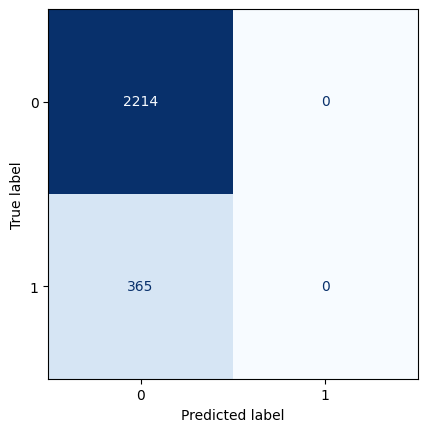

In [ ]:
print_scores(y_test,y_pred_lin_svm);

Using linear Support Vector Machine (SVM) as a metric for model learning is suboptimal, as indicated by the balanced accuracy score of 0.5. This score suggests that the model's predictive performance is on par with random chance or a coin toss. A closer look at other performance metrics is not even needed as the imbalanced nature of the dataset renders them less informative than the balanced accuracy score.

To reap the benefits of a good SVM, we need to hyper tune the parameters. To achieve this, we experimented with various search strategies such as grid search, randomized search, and Bayesian search. However, these approaches proved computationally intensive and time-consuming due to the substantial number of parameters which requiring tuning. Consequently, we opted for the Halving Randomized Search strategy. It strikes a balance between efficiency and effectiveness, making it advantageous for tuning SVM parameters in such a large search space.

### Halving Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.svm import SVC
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import loguniform, randint

svm_hr_pipeline = Pipeline([
    ("preprocessing", prep_pipeline),
    ("svm", SVC()),
])

param_distr = [
  {'svm__kernel': ['linear'], 'svm__C': loguniform(1e-1, 1e+3)},
  {'svm__kernel': ['rbf'], 'svm__C': loguniform(1e-1, 1e+3), 'svm__gamma': loguniform(1e-3, 1)},
  {'svm__kernel': ['poly'], 'svm__C': loguniform(1e-1, 1e+3), 'svm__gamma': loguniform(1e-3, 1), 'svm__degree': randint(2, 5)},
]

random_search = HalvingRandomSearchCV(svm_hr_pipeline, param_distr, cv=3,
                                      n_candidates=40, min_resources='exhaust',
                                      scoring='balanced_accuracy', random_state=0)
random_search.fit(X_train, y_train)

random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
random_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1)

,iter,n_resources,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,mean_test_score
60,3,10287,757.24475,rbf,0.091079,NaN,0.914658
59,3,10287,325.667099,rbf,0.033797,NaN,0.892165
55,2,3429,757.24475,rbf,0.091079,NaN,0.874605
58,2,3429,325.667099,rbf,0.033797,NaN,0.874338
57,2,3429,28.079081,rbf,0.070925,NaN,0.867799
...,...,...,...,...,...,...,...
26,0,381,0.113315,rbf,0.073882,NaN,0.500000
39,0,381,0.385272,poly,0.006457,4,0.500000
35,0,381,1.880511,poly,0.002485,4,0.500000
34,0,381,0.237554,poly,0.001776,3,0.500000


### Scores and Costs with Best Parameters

Accuracy = 0.9779, Balanced Accuracy = 0.9311
Precision = 0.9753, Recall = 0.8658, F1-score = 0.9173
Cost = 1722


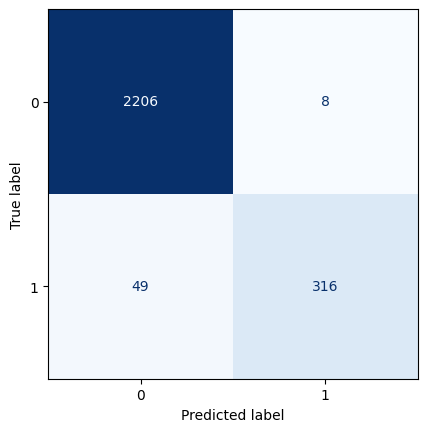

In [ ]:
y_pred = random_search.best_estimator_.predict(X_test)
print_scores(y_test, y_pred)

The hyper-tuned SVM model aligns with our initial assumption of a non-linear relationship within the dataset. The radial kernel with a coefficient of 0.091, and a regularisation strength of 757.24 helps us create a complex classification model with enhanced model accuracy, balanced accuracy, precision, recall, F1-score, and cost-effectiveness compared to the initial Linear SVM.

## 5. XGBoost - Ensemble Method

### Preprocessing Data

In [ ]:
tr_X = prep_pipeline.fit_transform(X_train)
tr_y = y_train

t_X = prep_pipeline.transform(X_test)
t_y = y_test

X_train.shape, tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((10313, 8), (10313, 8), (10313,), (2579, 8), (2579,))

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42)),
        ('knn', KNeighborsClassifier())

    ]
)

voting_clf.fit(tr_X, tr_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(t_X, t_y):.4f}')

print(f'Them voting give {voting_clf.score(t_X, t_y):.4f}')

Accuracy of dt is 0.9907
Accuracy of svc is 0.9624
Accuracy of knn is 0.9318
Them voting give 0.9767


In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    balanced_acc = balanced_accuracy_score(t_y, clf.predict(t_X))
    print(f'Balanced Accuracy of {name} is {balanced_acc:.4f}')
ensemble_balanced_acc = balanced_accuracy_score(t_y, voting_clf.predict(t_X))
print(f'The voting ensemble has a Balanced Accuracy of {ensemble_balanced_acc:.4f}')

Balanced Accuracy of dt is 0.9786
Balanced Accuracy of svc is 0.8797
Balanced Accuracy of knn is 0.8253
The voting ensemble has a Balanced Accuracy of 0.9201


The decision tree (dt) achieved a balance accuracy of 97.86%, the support vector machine (svc) achieved a balance accuracy of 87.97%, and the k-nearest neighbors (knn) achieved a balance accuracy of 82.53%. The ensemble method of voting, combining these models, resulted in an overall balanced accuracy of 92.01%. For svc and knn the voting classifier improve the model but for dt, it's already high, so we may try stacking to give more weight on dt which performs well.

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42)),
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=XGBClassifier(random_state=42),
    cv=5
)

stacking_clf.fit(tr_X, tr_y)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 e...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

### Scores and Costs

In [ ]:
print(f'Stacking the three has accuracy of {stacking_clf.score(t_X, t_y):.4f}')
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, make_scorer
predictions = stacking_clf.predict(t_X)
print(f'Stacking the three has balance accuracy of {balanced_accuracy_score(t_y, predictions):.4f}')

Stacking the three has accuracy of 0.9922
Stacking the three has balance accuracy of 0.9806


The stacking ensemble, which combines three models, achieved an accuracy of 99.22%. This suggests that the ensemble performed well in correctly predicting the class labels. The balance accuracy of the stacking ensemble is 98.06%. Balance accuracy takes into account the accuracy of each class, providing a more comprehensive evaluation, especially in imbalanced datasets.

In [ ]:
report = classification_report(t_y, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2214
           1       0.98      0.96      0.97       365

    accuracy                           0.99      2579
   macro avg       0.99      0.98      0.98      2579
weighted avg       0.99      0.99      0.99      2579



In [ ]:
confusion_matrix = confusion_matrix(t_y, predictions)
print(confusion_matrix)

[[2207    7]
 [  13  352]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def default_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 0] * 34 + cm[0, 1] * 7

cost_scorer = make_scorer(default_cost)

xgb_costs = cross_val_score(stacking_clf, tr_X, tr_y, cv=5, scoring=cost_scorer)
print(f'The average cost of Stacking is {xgb_costs.mean():.1f}.')

The average cost of Stacking is 698.2.


The average cost of the stacking ensemble is 698.2. This cost metric reflects the combined impact of misclassifications and may involve different costs assigned to false positives and false negatives.

In [ ]:
test_cost = default_cost(t_y, predictions)
print(f'The cost on the test set is {test_cost:.0f}.')

The cost on the test set is 491.


The cost on the test set for the stacking ensemble is 491. This indicates the total cost incurred by the model when making predictions on a separate set of data. A lower cost is generally desired, suggesting that the model is effective in minimizing misclassification costs.

In summary, the stacking ensemble demonstrated high accuracy and balance accuracy, while the cost metrics provide insights into the economic implications of the model's predictions. The lower cost on the test set suggests that the stacking ensemble performs well in terms of cost-effectiveness.

## 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


rf_pipe = make_pipeline(prep_pipeline, RandomForestClassifier(n_estimators=100, random_state=42))
rf_scores = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='balanced_accuracy')
rf_pipe.fit(X_train, y_train)

y_pred_rf= rf_pipe.predict(X_test)
print('Balanced accuracy score :' ,balanced_accuracy_score(y_test,y_pred_rf))
print(f'The balanced accuracy of Random Forest is {rf_scores.mean():.3f}.')


Balanced accuracy score : 0.9833358082439272
The balanced accuracy of Random Forest is 0.975.


In [ ]:
from sklearn.model_selection import cross_val_score
clf_costs = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring=cost_scorer)
print(f'The average cost of clf is {clf_costs.mean():.1f}.')

The average cost of clf is 499.6.


### RandomizedSearchCV for Best Parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'randomforestclassifier__max_depth': [int(x) for x in np.linspace(10, 100, 10)],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 6, 8]
}

random_search = RandomizedSearchCV(rf_pipe, param_distribs, n_iter=20, cv=3,
                                   scoring='balanced_accuracy', random_state=42)

random_search.fit(X_train, y_train)

# Print the best estimator
print("Best Estimator:", random_search.best_estimator_)

# Display the best parameters and corresponding mean test score
random_rf_res = pd.DataFrame(random_search.cv_results_)
random_rf_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
random_rf_res.filter(regex='(^param_|mean_test_score)', axis=1).head()


Best Estimator: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard '
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7841da1b6ad0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
   

,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_depth,mean_test_score
19,1,40,0.962515
2,1,70,0.962515
3,1,100,0.962515
7,1,60,0.962515
17,2,100,0.936678


### Scores and Cost

In [ ]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score

best_model_rf = random_search.best_estimator_
y_pred_rf_best= best_model_rf.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf_best)
print(f'Balanced accuracy of the best found model on the test data is {test_balanced_accuracy:.2f}')
print('Accuracy score of the best found model on the test data is:' , accuracy_score(y_test,y_pred_rf_best))

Balanced accuracy of the best found model on the test data is 0.98
Accuracy score of the best found model on the test data is: 0.9949592865451725


In [ ]:
# Calculate the cost on the test set
test_cost = default_cost(y_test, y_pred_rf_best)
print(f'The cost on the test set is {test_cost:.1f}.')



The cost on the test set is 415.0.


# Cost Optimization

The aim of the the model is to now reduce the cost of misclasifications such that the model proves to be economical, on top of it being accurate. We try to find the optimal threshold whihc minimises the misclassification costs, such that every model probability greater than the threshold is classified as 1 (as misclassification of false negative is costlier).

### KNN

After optimization, threshold should be set at 0.01, which will lead to cost of misclassification of 1886.


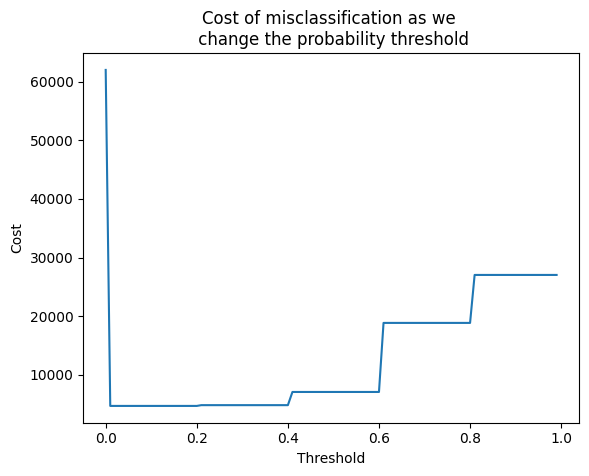

In [ ]:
knn_pipeline.fit(X_train,y_train)

def predict_labels(pos_probs, threshold):
    return np.where(pos_probs >= threshold, 1, 0)

class_probabilities_knn = knn_pipeline.predict_proba(X_train)

probs_knn = class_probabilities_knn[:, 1]

step_size = 0.01
thresholds = np.arange(0, 1, step_size)

scores_knn = [default_cost(y_train, predict_labels(probs_knn, t)) for t in thresholds]

ix = np.argmin(scores_knn)
opt_thresh_knn = thresholds[ix]

test_class_probabilities_knn = knn_pipeline.predict_proba(X_test)
test_probs_knn = test_class_probabilities_knn[:, 1]
opt_cost_knn = default_cost(y_test, predict_labels(test_probs_knn, opt_thresh_knn))



print(f'After optimization, threshold should be set at {opt_thresh_knn:.2f},\
 which will lead to cost of misclassification of {opt_cost_knn}.')

plt.plot(thresholds, scores_knn);
plt.xlabel('Threshold'); plt.ylabel("Cost");
plt.title('Cost of misclassification as we \n change the probability threshold');

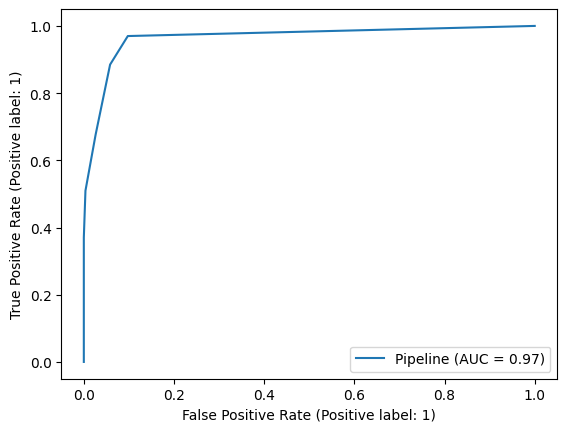

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(knn_pipeline,X_test,y_test);

###Stacking

After optimization, threshold should be set at 0.28, which will lead to cost of misclassification of 444.


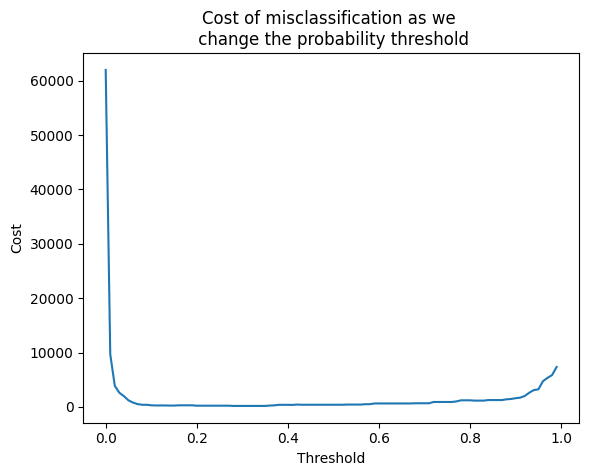

In [ ]:
def predict_labels(pos_probs, threshold):
    return np.where(pos_probs >= threshold, 1, 0)

class_probabilities = stacking_clf.predict_proba(tr_X)

probs = class_probabilities[:, 1]

step_size = 0.01
thresholds = np.arange(0, 1, step_size)

scores = [default_cost(tr_y, predict_labels(probs, t)) for t in thresholds]

ix = np.argmin(scores)
opt_thresh = thresholds[ix]

test_class_probabilities = stacking_clf.predict_proba(t_X)
test_probs = test_class_probabilities[:, 1]
opt_cost = default_cost(t_y, predict_labels(test_probs, opt_thresh))

print(f'After optimization, threshold should be set at {opt_thresh:.2f},\
 which will lead to cost of misclassification of {opt_cost}.')


plt.plot(thresholds, scores);
plt.xlabel('Threshold'); plt.ylabel("Cost");
plt.title('Cost of misclassification as we \n change the probability threshold');

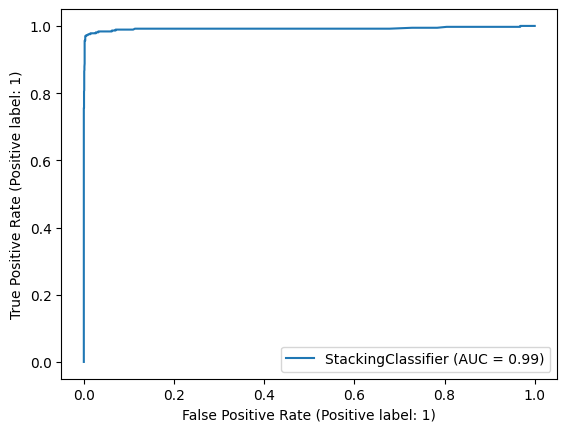

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(stacking_clf, t_X, t_y);

Tuning the threshold in the KNN model gives a probbaility threshold of 0.01, with a cost of USD 1886, and AUC as 0.97. Whereas, in the stacking cost optimization at the threshold of 0.28, cost is as low as USD 444 with 0.99 AUC.

# Conclusion

In conclusion, the stacking method with XGBoost exhibits the best performance with a balanced accuracy of 0.9806 and an average cost reduction to $698.2 among 5 models applied. The ensemble method with stacking XGBoost is a model combining 3 best performance models which are decision tree, SVC and KNN.

# Citations

Wagh, S. K., & Wagh, K. S. (2022). Customer churn prediction in telecom sector using Machine Learning Techniques. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.4158415


Kapoor, A. (2017, February 17). CHURN IN THE TELECOM INDUSTRY – IDENTIFYING CUSTOMERS LIKELY TO CHURN AND HOW TO RETAIN THEM. Aditya Kapoor. https://wp.nyu.edu/adityakapoor/2017/02/17/churn-in-the-telecom-industry-identifying-customers-likely-to-churn-and-how-to-retain-them/


Gilbert, N. (2023, October 20). Customer Experience Management in telecoms: Benefits, costs & statistics. Financesonline.com. https://financesonline.com/customer-experience-management-in-telecoms/